In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
#preparing encoding ordinal columns
df["Gender"].replace("Male",0, inplace=True)
df["Gender"].replace("Female",1, inplace=True)

df["Married"].replace("Yes",0, inplace=True)
df["Married"].replace("No",1, inplace=True)

df["Education"].replace("Graduate",0, inplace=True)
df["Education"].replace("Not Graduate",1, inplace=True)

df["Self_Employed"].replace("Yes",0, inplace=True)
df["Self_Employed"].replace("No",1, inplace=True)

df["Property_Area"].replace("Urban",0, inplace=True)
df["Property_Area"].replace("Semiurban",1, inplace=True)
df["Property_Area"].replace("Rural",2, inplace=True)

# df["Loan_Status"].replace("Y",0, inplace=True)
# df["Loan_Status"].replace("N",1, inplace=True)

df["Dependents"].replace("3+",3, inplace=True)


In [21]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3]:
#imputing
df["Gender"].fillna(2, inplace=True)
df["Married"].fillna(2, inplace=True)
df["Self_Employed"].fillna(2, inplace=True)
df["Dependents"].fillna(4, inplace=True)



In [4]:
medianLoanAmount = df["LoanAmount"].median()
df["LoanAmount"].fillna(medianLoanAmount, inplace=True)
medianLoan_Amount_Term = df["Loan_Amount_Term"].median()
df["Loan_Amount_Term"].fillna(medianLoan_Amount_Term, inplace=True)
medianCredit_History = df["Credit_History"].median()
df["Credit_History"].fillna(medianCredit_History, inplace=True)

#print(df.isnull().sum())
#print(df.describe())
#print(df["LoanAmount"].describe())



In [24]:
print(df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       613.000000         613.000000  591.000000        599.000000   
mean       5404.797716        1623.890571  146.434856        341.969950   
std        6113.940585        2927.903583   85.658043         65.170672   
min         150.000000           0.000000    9.000000         12.000000   
25%        2876.000000           0.000000  100.000000        360.000000   
50%        3812.000000        1210.000000  128.000000        360.000000   
75%        5800.000000        2302.000000  168.000000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      563.000000  
mean         0.843694  
std          0.363468  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


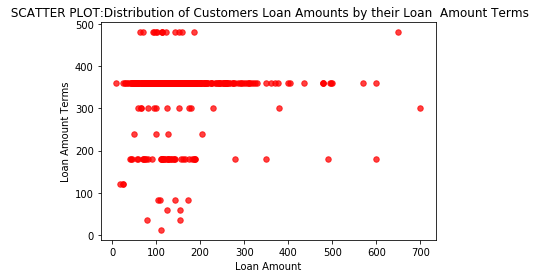

In [6]:
#Plotting
fig, ax = plt.subplots()
ax.scatter(df["LoanAmount"], df["Loan_Amount_Term"], s = 30, color = "red", alpha=0.75)
ax.set_xlabel("Loan Amount")
ax.set_ylabel("Loan Amount Terms")
ax.set_title(" SCATTER PLOT:Distribution of Customers Loan Amounts by their Loan  Amount Terms")
plt.show()

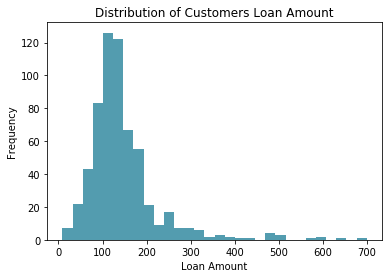

In [7]:
#Histogram
fig, ax = plt.subplots()
ax.hist(df['LoanAmount'], color='#539caf', bins=30)
ax.set_title("Distribution of Customers Loan Amount")
ax.set_xlabel("Loan Amount")
ax.set_ylabel("Frequency")
plt.show()

No handles with labels found to put in legend.


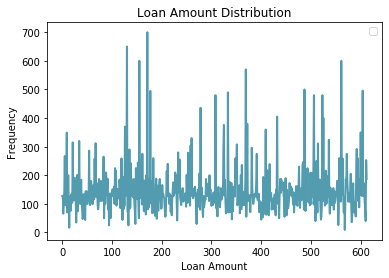

In [8]:
#density plot
fig,  ax = plt.subplots()
ax.plot(df['LoanAmount'], color='#539caf', lw=2)
ax.set_ylabel("Frequency")
ax.set_xlabel("Loan Amount")
ax.set_title("Loan Amount Distribution")
ax.legend(loc='best')
plt.show()

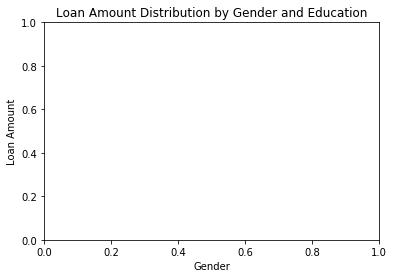

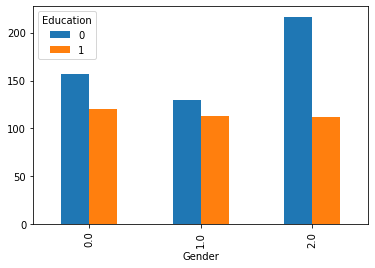

In [9]:
#stacked bar, gender vs education vs their loan amount
fig,  ax = plt.subplots()
df.groupby(['Gender', 'Education'])['LoanAmount'].mean().unstack().plot(kind='bar',
stacked=False)
ax.set_ylabel("Loan Amount")
ax.set_xlabel("Gender")
ax.set_title("Loan Amount Distribution by Gender and Education")
plt.show()

In [10]:
# #Classification and predicting
# subset = df[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount',
#              'Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']]
#df["Property_Area"].replace("Semiurban",1, inplace=True)

array= df.values
X = array[:,1:12]  # upto to 11
Y = array[:, 12]
print(Y)
#
# #split to train, test
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size=0.30, random_state=10)



['Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N'
 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N'
 'N' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
print(predictions)


['Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y']


In [18]:
print(accuracy_score(Y_test, predictions))

0.8043478260869565


In [15]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           N       0.94      0.31      0.47        51
           Y       0.79      0.99      0.88       133

    accuracy                           0.80       184
   macro avg       0.87      0.65      0.68       184
weighted avg       0.83      0.80      0.77       184



In [16]:
print(confusion_matrix(Y_test, predictions))
#

[[ 16  35]
 [  1 132]]


In [13]:
# #new observation
newobservation = model.predict([[0,0,1,0,0,3000,2000,200,360,1,1]])
print(newobservation)


['Y']
